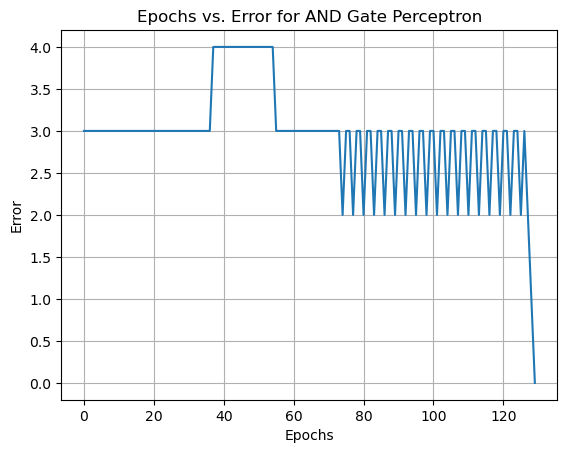

Learned Weights: W0 = -0.10000000000000765, W1 = 0.1000000000000001, W2 = 0.05000000000000032


In [1]:
import numpy as np
import matplotlib.pyplot as plt

 

# AND gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output data
y = np.array([0, 0, 0, 1])

 

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

 

# Define the Step activation function
def step_activation(z):
    return 1 if z >= 0 else 0

 

# Initialize variables for tracking epochs and errors
epochs = 0
errors = []

 

# Training loop
while True:
    error_sum = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # Calculate the weighted sum
        z = W0 + W1 * xi[0] + W2 * xi[1]

        # Calculate the predicted output
        predicted = step_activation(z)

        # Calculate the error
        error = target - predicted
        error_sum += error ** 2

        # Update weights and bias
        W0 += learning_rate * error
        W1 += learning_rate * error * xi[0]
        W2 += learning_rate * error * xi[1]

    epochs += 1
    errors.append(error_sum)

    # Check for convergence condition or maximum epochs
    if error_sum <= 0.002 or epochs >= 1000:
        break

 

# Plot epochs vs. error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for AND Gate Perceptron')
plt.grid(True)
plt.show()

 

# Print the learned weights and bias
print(f"Learned Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")

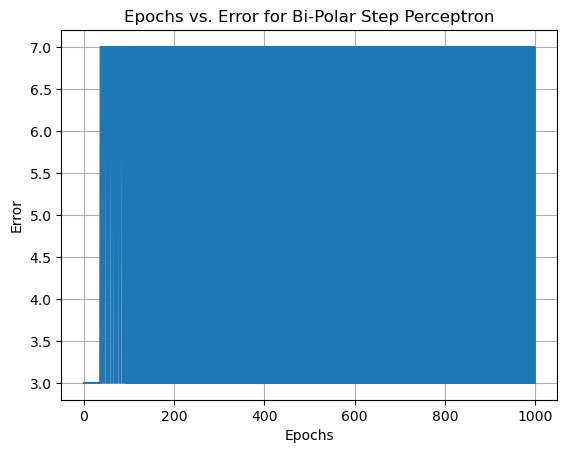

Learned Weights: W0 = -0.0999999999999975, W1 = 0.09999999999999902, W2 = 0.05000000000000643


In [2]:
import numpy as np
import matplotlib.pyplot as plt

 

# AND gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output data
y = np.array([0, 0, 0, 1])

 

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

 

# Define the Bi-Polar Step activation function
def bipolar_step_activation(z):
    return 1 if z > 0 else -1

 

# Initialize variables for tracking epochs and errors
epochs = 0
errors = []

 

# Training loop
while True:
    error_sum = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # Calculate the weighted sum
        z = W0 + W1 * xi[0] + W2 * xi[1]

        # Calculate the predicted output
        predicted = bipolar_step_activation(z)

        # Calculate the error
        error = target - predicted
        error_sum += error ** 2

        # Update weights and bias
        W0 += learning_rate * error
        W1 += learning_rate * error * xi[0]
        W2 += learning_rate * error * xi[1]

    epochs += 1
    errors.append(error_sum)

    # Check for convergence condition or maximum epochs
    if error_sum <= 0.002 or epochs >= 1000:
        break

 

# Plot epochs vs. error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Bi-Polar Step Perceptron')
plt.grid(True)
plt.show()

 

# Print the learned weights and bias
print(f"Learned Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")

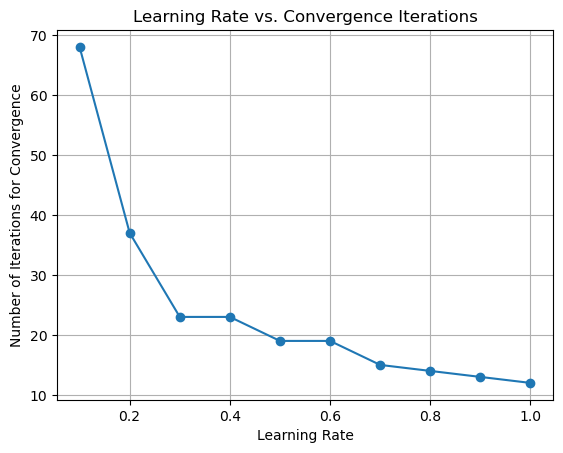

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the AND gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initialize initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Define a range of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize lists to store the number of iterations for each learning rate
iterations_needed = []

# Training loop for each learning rate
for learning_rate in learning_rates:
    # Initialize weights
    W = initial_weights.copy()
    
    # Initialize variables for tracking epochs and errors
    epochs = 0
    
    # Training loop
    while True:
        error = 0
        for i in range(len(X)):
            # Calculate the weighted sum
            weighted_sum = np.dot(X[i], W[1:]) + W[0]
            
            # Apply the step activation function
            output = 1 if weighted_sum >= 0 else 0
            
            # Calculate the error
            delta = y[i] - output
            
            # Update weights
            W[1:] += learning_rate * delta * X[i]
            W[0] += learning_rate * delta
            
            # Update the error
            error += delta ** 2
        
        # Calculate the mean squared error for this epoch
        mean_squared_error = error / len(X)
        
        # Increment the epoch counter
        epochs += 1
        
        # Check for convergence
        if mean_squared_error <= 0.002 or epochs >= 1000:
            break
    
    # Append the number of iterations needed for this learning rate
    iterations_needed.append(epochs)

# Plotting the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations for Convergence')
plt.title('Learning Rate vs. Convergence Iterations')
plt.grid(True)
plt.show()


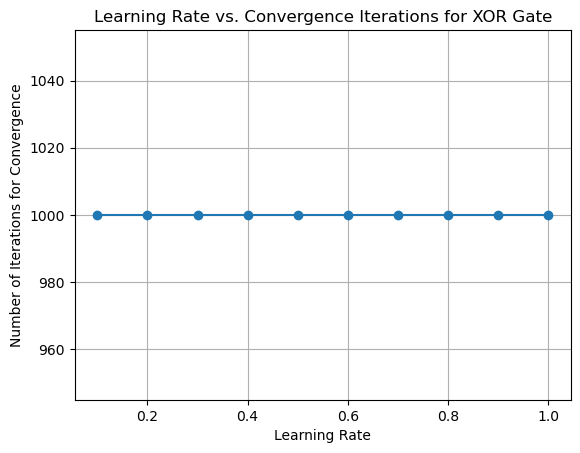

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize initial weights
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

initial_weights_input_hidden = np.random.uniform(-1, 1, (input_layer_size, hidden_layer_size))
initial_weights_hidden_output = np.random.uniform(-1, 1, (hidden_layer_size, output_layer_size))

# Define a range of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize lists to store the number of iterations for each learning rate
iterations_needed = []

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop for each learning rate
for learning_rate in learning_rates:
    # Initialize weights
    weights_input_hidden = initial_weights_input_hidden.copy()
    weights_hidden_output = initial_weights_hidden_output.copy()
    
    # Initialize variables for tracking epochs and errors
    epochs = 0
    
    # Training loop
    while True:
        error = 0
        for i in range(len(X)):
            # Forward propagation
            input_layer = X[i]
            hidden_layer_input = np.dot(input_layer, weights_input_hidden)
            hidden_layer_output = sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
            output_layer_output = sigmoid(output_layer_input)
            
            # Calculate the error
            delta_output = y[i] - output_layer_output
            
            # Backpropagation
            delta_hidden = delta_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)
            
            # Update weights
            weights_hidden_output += learning_rate * hidden_layer_output.reshape(-1, 1) * delta_output
            weights_input_hidden += learning_rate * input_layer.reshape(-1, 1) * delta_hidden
            
            # Update the error
            error += (delta_output ** 2).sum()
        
        # Calculate the mean squared error for this epoch
        mean_squared_error = error / len(X)
        
        # Increment the epoch counter
        epochs += 1
        
        # Check for convergence
        if mean_squared_error <= 0.002 or epochs >= 1000:
            break
    
    # Append the number of iterations needed for this learning rate
    iterations_needed.append(epochs)

# Plotting the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations for Convergence')
plt.title('Learning Rate vs. Convergence Iterations for XOR Gate')
plt.grid(True)
plt.show()


In [3]:
import numpy as np

# Define the data
data = np.array([
    [1206, 2.386, 3, 2893, 1],  # High Value
    [1636, 2.89, 3, 2893, 1],   # High Value
    [2762, 3.93, 3, 2893, 1],   # High Value
    [1911, 0.10, 10, 110, 0],   # Low Value
    [2442, 2.80, 2, 280, 1],    # High Value
    [2151, 6.7, 2, 167, 0],     # Low Value
    [1542, 2.71, 5, 271, 1],    # High Value
    [1842, 2.74, 2, 274, 1],    # High Value
    [1141, 4.8, 1, 148, 0],     # Low Value
    [1624, 19.8, 3, 198, 0]     # Low Value
])

# Split data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Initialize weights and learning rate
np.random.seed(0)  # For reproducibility
weights = np.random.rand(X.shape[1])  # Initialize weights with random values
learning_rate = 0.01

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Training loop
epochs = 10000  # Maximum number of epochs
for epoch in range(epochs):
    # Calculate the weighted sum of inputs
    weighted_sum = np.dot(X, weights)
    
    # Apply the sigmoid activation function
    predicted = sigmoid(weighted_sum)
    
    # Calculate the error
    error = y - predicted
    
    # Update weights using gradient descent
    weights += learning_rate * np.dot(X.T, error * predicted * (1 - predicted))
    
# Predictions after training
predicted_values = sigmoid(np.dot(X, weights))

# Threshold for classification (0.5)
threshold = 0.5

# Classify the transactions based on the threshold
classified_transactions = ["High Value" if pred >= threshold else "Low Value" for pred in predicted_values]

# Print the classified transactions
for i, transaction in enumerate(classified_transactions):
    print(f"Transaction {i + 1}: {transaction}")


Transaction 1: High Value
Transaction 2: High Value
Transaction 3: High Value
Transaction 4: High Value
Transaction 5: High Value
Transaction 6: High Value
Transaction 7: High Value
Transaction 8: High Value
Transaction 9: High Value
Transaction 10: High Value


In [4]:
import numpy as np

# Define the data
data = np.array([
    [1206, 2.386, 3, 2893, 1],  # High Value
    [1636, 2.89, 3, 2893, 1],   # High Value
    [2762, 3.93, 3, 2893, 1],   # High Value
    [1911, 0.10, 10, 110, 0],   # Low Value
    [2442, 2.80, 2, 280, 1],    # High Value
    [2151, 6.7, 2, 167, 0],     # Low Value
    [1542, 2.71, 5, 271, 1],    # High Value
    [1842, 2.74, 2, 274, 1],    # High Value
    [1141, 4.8, 1, 148, 0],     # Low Value
    [1624, 19.8, 3, 198, 0]     # Low Value
])

# Split data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Add a bias term (intercept) to the features
X_with_bias = np.column_stack((np.ones(X.shape[0]), X))

# Calculate the weights using matrix pseudo-inverse
weights = np.linalg.pinv(X_with_bias).dot(y)

# Predictions using the calculated weights
predicted_values = X_with_bias.dot(weights)

# Threshold for classification (0.5)
threshold = 0.5

# Classify the transactions based on the threshold
classified_transactions = ["High Value" if pred >= threshold else "Low Value" for pred in predicted_values]

# Print the classified transactions
for i, transaction in enumerate(classified_transactions):
    print(f"Transaction {i + 1}: {transaction}")


Transaction 1: High Value
Transaction 2: High Value
Transaction 3: High Value
Transaction 4: Low Value
Transaction 5: High Value
Transaction 6: High Value
Transaction 7: Low Value
Transaction 8: High Value
Transaction 9: Low Value
Transaction 10: Low Value


In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class NeuralNetwork:
    def __init__(self, input_dim):
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn()

    def forward(self, x):
        z = np.dot(x, self.weights) + self.bias
        a = sigmoid(z)
        return a

    def backward(self, x, y, a):
        delta = y - a
        dz = delta * a * (1 - a)
        dw = x * dz
        db = dz

        self.weights += 0.05 * dw
        self.bias += 0.05 * db

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                x = X[i]
                y_hat = self.forward(x)
                y_single = y[i]

                self.backward(x, y_single, y_hat)

    def predict(self, X):
        a = self.forward(X)
        y_pred = np.round(a)
        return y_pred

# Create the neural network
nn = NeuralNetwork(2)

# Train the neural network on the AND gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

nn.train(X, y, epochs=1000)

# Make predictions
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_pred = nn.predict(X_test)

# Print the predictions
print(y_pred)


[0. 0. 0. 1.]


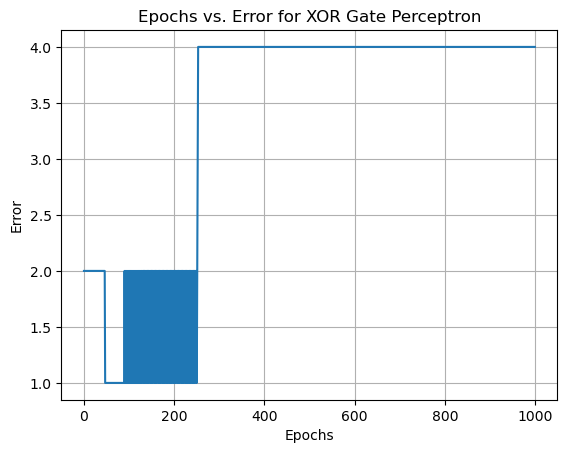

Learned Weights: W0 = 0.09999999999999236, W1 = -0.09999999999999969, W2 = -0.09999999999999969


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Define the Step activation function
def step_activation(z):
    return 1 if z >= 0 else 0

# Initialize variables for tracking epochs and errors
epochs = 0
errors = []

# Training loop
while True:
    error_sum = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # Calculate the weighted sum
        z = W0 + W1 * xi[0] + W2 * xi[1]

        # Calculate the predicted output
        predicted = step_activation(z)

        # Calculate the error
        error = target - predicted
        error_sum += error ** 2

        # Update weights and bias
        W0 += learning_rate * error
        W1 += learning_rate * error * xi[0]
        W2 += learning_rate * error * xi[1]

    epochs += 1
    errors.append(error_sum)

    # Check for convergence condition or maximum epochs
    if error_sum <= 0.002 or epochs >= 1000:
        break

# Plot epochs vs. error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for XOR Gate Perceptron')
plt.grid(True)
plt.show()

# Print the learned weights and bias
print(f"Learned Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")


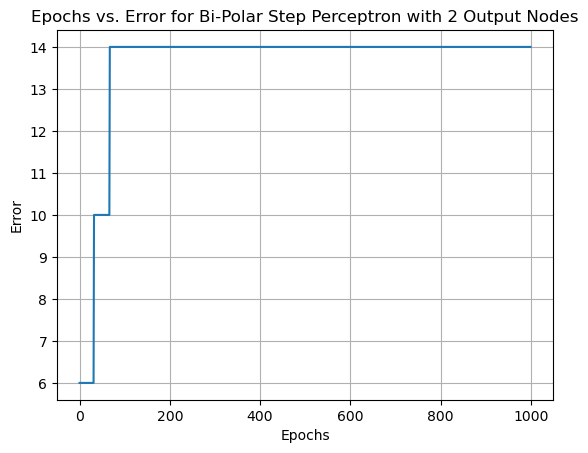

Learned Weights: W0 = -233.30000000000769, W1 = -99.79999999999647, W2 = -100.74999999999642, W3 = -146.29999999999697


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output data
y = np.array([[1, 0], [0, 0], [0, 0], [0, 1]])

# Initialize weights and bias
W0, W1, W2, W3 = 10, 0.2, -0.75, 0.5
learning_rate = 0.05

# Define the Bi-Polar Step activation function
def bipolar_step_activation(z):
    return 1 if z > 0 else -1

# Initialize variables for tracking epochs and errors
epochs = 0
errors = []

# Training loop
while True:
    error_sum = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # Calculate the weighted sum
        z0 = W0 + W1 * xi[0] + W2 * xi[1]
        z1 = W0 + W3 * xi[0] + W2 * xi[1]

        # Calculate the predicted output
        predicted = np.array([bipolar_step_activation(z0), bipolar_step_activation(z1)])

        # Calculate the error
        error = target - predicted
        error_sum += np.sum(error ** 2)  # Calculate the sum of squared errors

        # Update weights and bias
        W0 += learning_rate * error[0] * predicted[0]
        W1 += learning_rate * error[0] * predicted[0] * xi[0]
        W2 += learning_rate * error[0] * predicted[0] * xi[1]
        W3 += learning_rate * error[1] * predicted[1] * xi[0]

    epochs += 1
    errors.append(error_sum)

    # Check for convergence condition or maximum epochs
    if error_sum <= 0.002 or epochs >= 1000:
        break

# Plot epochs vs. error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Bi-Polar Step Perceptron with 2 Output Nodes')
plt.grid(True)
plt.show()

# Print the learned weights and bias
print(f"Learned Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}, W3 = {W3}")


In [11]:
from sklearn.neural_network import MLPClassifier

# XOR gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y = np.array([0, 1, 1, 0])

# Create an MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=10000, random_state=42)

# Train the classifier
clf.fit(X, y)

# Make predictions
y_pred = clf.predict(X)

# Print the predictions
print("Predicted Outputs:", y_pred)


Predicted Outputs: [0 0 0 0]


In [12]:
from sklearn.neural_network import MLPClassifier

# AND gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output data
y = np.array([0, 0, 0, 1])

# Create an MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=10000, random_state=42)

# Train the classifier
clf.fit(X, y)

# Make predictions
y_pred = clf.predict(X)

# Print the predictions
print("Predicted Outputs:", y_pred)


Predicted Outputs: [0 0 0 1]


In [13]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the training and testing datasets from Excel files
training_data = pd.read_excel("training (3).xlsx")
testing_data = pd.read_excel("testing (3).xlsx")

# Convert the "Equation" column into a numerical feature (character count)
training_data["input_Num"] = training_data["input"].str.len()
testing_data["Equation_Num"] = testing_data["Equation"].str.len()

# Ensure that both datasets have the same columns
common_columns = set(training_data.columns).intersection(testing_data.columns)
training_data = training_data[list(common_columns)]
testing_data = testing_data[list(common_columns)]

# Prepare the training data and labels
X_train = training_data.drop(columns=["Classification"])
y_train = training_data["Classification"]

# Prepare the testing data and labels
X_test = testing_data.drop(columns=["Classification"])
y_test = testing_data["Classification"]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of the MLPClassifier with desired parameters
clf = MLPClassifier(hidden_layer_sizes=(5, 2), solver='lbfgs', alpha=1e-5, random_state=1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("MLP Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

MLP Accuracy: 1.0
Confusion Matrix:
[[43  0]
 [ 0 27]]
